In [1]:
import wandb
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


In [2]:
api = wandb.Api()

run = api.run('autoconvnext/mms/1alqzqhy')

In [3]:
history = run.history()#.plot(x='_step', y='meta_valid_acc')

In [4]:
history['meta_valid_acc'] = savgol_filter(history['meta_valid_acc'], 51, 3)
history['meta_train_acc'] = savgol_filter(history['meta_train_acc'], 51, 3)
history['meta_valid_err'] = savgol_filter(history['meta_valid_err'], 51, 3)
history['meta_train_err'] = savgol_filter(history['meta_train_err'], 51, 3)


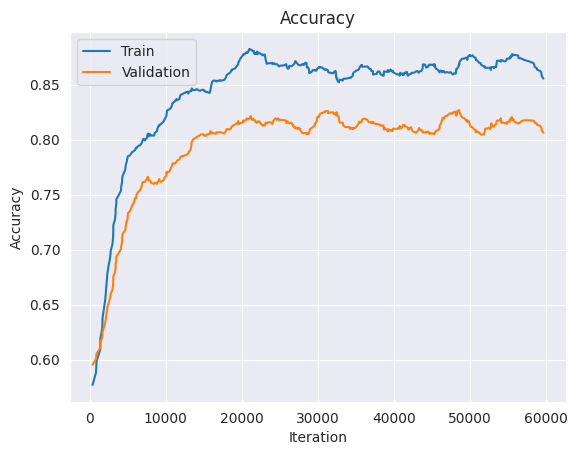

In [5]:
sns.set_style("darkgrid")

g_results = sns.lineplot(history, x='_step', y='meta_train_acc', label='Train')
g_results = sns.lineplot(history, x='_step', y='meta_valid_acc', label='Validation')


g_results.set_xlabel('Iteration')
g_results.set_ylabel('Accuracy')
g_results.set_title('Accuracy')

plt.savefig('accs.png')

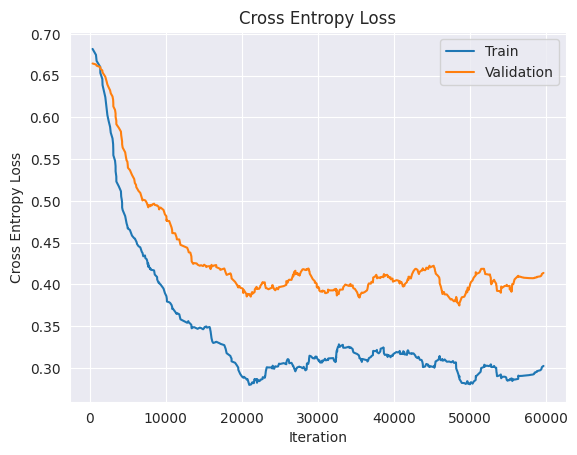

In [6]:
sns.set_style("darkgrid")

g_results = sns.lineplot(history, x='_step', y='meta_train_err', label='Train')
g_results = sns.lineplot(history, x='_step', y='meta_valid_err', label='Validation')


g_results.set_xlabel('Iteration')
g_results.set_ylabel('Cross Entropy Loss')
g_results.set_title('Cross Entropy Loss')
plt.savefig('loss.png')